In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import api as sm 
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, PredefinedSplit
from sklearn.multiclass import OneVsRestClassifier
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score, plot_confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_test = pd.read_csv('Q1/communities_test.csv')
data_train = pd.read_csv('Q1/communities_train.csv')
data_val = pd.read_csv('Q1/communities_val.csv')

In [3]:
data_test.head(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.00,0.49,0.07,0.94,0.04,0.01,0.59,0.47,0.41,0.42,...,0.13,0.70,0.63,0.67,0.71,0.00,0.45,0.16,0.0,0.12
1,0.01,0.59,0.02,0.97,0.04,0.02,0.41,0.51,0.30,0.23,...,0.11,0.63,0.74,0.64,0.76,0.05,0.07,0.12,0.0,0.08
2,0.02,0.32,0.02,0.97,0.07,0.02,0.38,0.64,0.47,0.40,...,0.11,0.45,0.45,0.42,0.34,0.08,0.08,0.08,0.0,0.04
3,0.01,0.56,0.11,0.76,0.25,0.27,0.36,0.46,0.30,0.51,...,0.39,0.69,0.78,0.72,0.80,0.01,0.36,0.22,0.0,0.19
4,0.08,0.24,0.39,0.68,0.04,0.01,0.33,0.39,0.27,0.66,...,0.06,0.63,0.51,0.63,0.57,0.10,0.15,0.15,0.0,0.29
5,0.01,0.34,0.03,0.93,0.17,0.04,0.23,0.31,0.19,0.67,...,0.20,0.70,0.86,0.82,0.80,0.01,0.41,0.37,0.0,0.08
6,0.05,0.46,0.49,0.50,0.07,0.29,0.47,0.48,0.31,0.36,...,0.10,0.76,0.63,0.84,0.85,0.18,0.05,0.01,0.0,0.28
7,0.06,0.64,0.34,0.37,0.75,0.44,0.41,0.54,0.32,0.23,...,0.56,0.52,0.42,0.58,0.68,0.03,0.37,0.25,0.0,0.36
8,0.02,0.15,0.01,0.94,0.11,0.13,0.15,0.30,0.17,0.44,...,0.33,0.38,0.42,0.61,0.68,0.02,0.22,0.11,0.0,0.33
9,0.01,0.61,0.21,0.83,0.02,0.01,0.41,0.49,0.26,0.21,...,0.03,0.70,0.40,0.34,0.57,0.05,0.06,0.01,0.0,0.06


In [4]:
data_train.head(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.01,0.33,0.00,0.94,0.21,0.11,0.26,0.37,0.22,0.74,...,0.44,0.73,0.90,0.73,0.85,0.01,0.45,0.47,0.0,0.06
1,0.01,0.09,0.02,0.89,0.23,0.13,0.07,0.71,0.27,0.15,...,0.24,0.37,0.25,0.46,0.34,0.00,1.00,0.06,0.0,0.22
2,0.01,0.53,0.02,0.92,0.21,0.03,0.98,1.00,1.00,0.20,...,0.17,0.32,0.13,0.04,0.18,0.01,0.32,0.01,0.0,0.07
3,0.01,0.36,0.00,0.98,0.02,0.00,0.42,0.45,0.29,0.53,...,0.01,0.81,0.50,0.65,0.76,0.04,0.11,0.00,0.0,0.07
4,0.01,0.68,0.01,0.98,0.04,0.01,0.71,0.60,0.62,0.39,...,0.10,0.71,0.67,0.73,0.55,0.08,0.06,0.07,0.0,0.03
5,0.03,0.55,0.06,0.87,0.28,0.05,0.31,0.41,0.20,0.15,...,0.24,0.55,0.46,0.40,0.56,0.16,0.04,0.17,0.0,0.01
6,0.00,0.40,0.59,0.53,0.01,0.00,0.44,0.43,0.25,0.51,...,0.00,0.90,0.71,0.81,0.81,0.01,0.15,0.01,0.0,0.24
7,0.04,0.53,0.23,0.66,0.32,0.22,0.49,0.63,0.44,0.21,...,0.21,0.09,0.13,0.06,0.00,0.41,0.02,0.15,0.0,0.05
8,0.02,0.26,0.09,0.93,0.03,0.01,0.35,0.36,0.26,0.74,...,0.03,0.76,0.62,0.84,0.75,0.02,0.24,0.08,0.0,0.46
9,0.08,0.45,0.18,0.83,0.07,0.02,0.63,0.63,0.59,0.54,...,0.07,0.77,0.49,0.61,0.67,0.08,0.17,0.07,0.7,0.13


In [5]:
data_val.head(10)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.20,0.46,0.76,0.36,0.11,0.03,0.47,0.59,0.42,0.30,...,0.08,0.45,0.44,0.41,0.36,0.15,0.22,0.13,0.91,0.19
1,0.17,0.35,0.03,0.84,0.21,0.17,0.36,0.42,0.28,0.53,...,0.29,0.58,0.34,0.57,0.71,0.10,0.28,0.13,0.56,0.22
2,0.23,0.58,0.53,0.55,0.08,0.02,0.43,0.50,0.29,0.25,...,0.05,0.58,0.48,0.44,0.61,0.99,0.04,0.06,0.47,0.18
3,0.06,0.40,0.06,0.69,0.81,0.14,0.92,1.00,1.00,0.16,...,0.41,0.50,0.12,0.02,0.55,0.02,0.46,0.19,0.00,0.06
4,0.10,0.41,0.34,0.72,0.03,0.01,0.50,0.52,0.40,0.49,...,0.03,0.83,0.53,0.77,0.77,0.05,0.30,0.06,0.61,0.62
5,0.01,0.60,0.03,0.97,0.02,0.02,0.41,0.43,0.30,0.39,...,0.16,0.83,0.86,0.93,0.94,0.06,0.06,0.02,0.00,0.09
6,0.02,0.50,0.77,0.22,0.30,0.29,0.31,0.40,0.24,0.44,...,0.74,0.22,0.66,0.65,0.48,0.01,0.42,0.87,0.00,0.26
7,0.08,0.47,0.13,0.83,0.22,0.04,0.40,0.53,0.30,0.27,...,0.19,0.78,0.58,0.56,0.71,0.06,0.24,0.24,0.00,0.15
8,0.00,0.44,0.30,0.72,0.04,0.05,0.42,0.51,0.33,0.40,...,0.05,0.95,0.60,0.95,0.94,0.01,0.29,0.07,0.00,0.33
9,0.01,0.33,0.00,0.99,0.03,0.01,0.36,0.49,0.29,0.54,...,0.03,0.79,0.52,0.80,0.84,0.01,0.27,0.07,0.00,0.07


In [6]:
data_test.shape

(299, 101)

In [7]:
data_train.shape

(298, 101)

In [8]:
data_val.shape

(298, 101)

In [9]:
data_test.isnull().sum().sum()

0

In [10]:
data_train.isnull().sum().sum()

0

In [11]:
data_val.isnull().sum().sum()

0

No missing values 

In [12]:
pd.set_option('display.max_columns', None)
data_test.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.061973,0.463077,0.189030,0.753378,0.152040,0.127124,0.436421,0.502308,0.345017,0.406054,0.069197,0.706221,0.358294,0.568161,0.294950,0.491104,0.456254,0.311639,0.470936,0.374783,0.347860,0.363846,0.293445,0.196923,0.322174,0.292642,0.38000,0.061271,0.302876,0.305987,0.373846,0.370769,0.362140,0.507592,0.386756,0.448127,0.390936,0.443278,0.461338,0.436890,0.492508,0.497860,0.486388,0.607090,0.618395,0.663880,0.585084,0.505786,0.525987,0.040234,0.249298,0.036221,0.333612,0.371572,0.405184,0.430635,0.180736,0.179732,0.180736,0.176321,0.806622,0.136321,0.261873,0.245853,0.460669,0.497258,0.403913,0.556522,0.175886,0.487391,0.332776,0.077023,0.726254,0.541605,0.199933,0.430167,0.508829,0.260635,0.235619,0.255786,0.253612,0.259532,0.333779,0.360769,0.413144,0.373813,0.482408,0.438763,0.396957,0.031572,0.027559,0.198629,0.609732,0.522475,0.620769,0.648528,0.064080,0.231940,0.166622,0.075351,0.235819
std,0.154041,0.174148,0.272104,0.255751,0.210371,0.210663,0.168293,0.155277,0.183033,0.180630,0.154594,0.443758,0.206760,0.183315,0.199895,0.184119,0.177936,0.222351,0.166467,0.194744,0.197507,0.192816,0.171800,0.159102,0.200497,0.212548,0.18906,0.158987,0.220499,0.214775,0.210438,0.216447,0.197175,0.175985,0.204006,0.182538,0.207569,0.190784,0.188682,0.190314,0.184780,0.192814,0.157266,0.209917,0.214756,0.223276,0.195672,0.175668,0.179314,0.125680,0.230898,0.111909,0.230914,0.227311,0.219827,0.205174,0.243275,0.240762,0.243149,0.237226,0.206876,0.201189,0.195966,0.188394,0.175580,0.163093,0.187001,0.202801,0.

In [13]:
data_train.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.00000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,0.051174,0.470168,0.187550,0.740436,0.161846,0.155772,0.428523,0.494664,0.337752,0.428926,0.057517,0.690034,0.344597,0.546544,0.287383,0.483893,0.481846,0.330470,0.486846,0.360336,0.335268,0.354161,0.291342,0.198054,0.309966,0.289530,0.384530,0.052785,0.321376,0.332987,0.401040,0.34896,0.391007,0.481342,0.392718,0.443758,0.397987,0.432248,0.460134,0.430369,0.488624,0.494866,0.491443,0.608993,0.616242,0.659698,0.578020,0.505235,0.522148,0.031745,0.254463,0.028926,0.321913,0.359128,0.398792,0.431342,0.190906,0.190403,0.193054,0.191846,0.773624,0.163087,0.275503,0.260000,0.465369,0.495302,0.411107,0.559799,0.202148,0.504966,0.315436,0.069228,0.724329,0.546913,0.198087,0.440034,0.488792,0.284060,0.258121,0.257718,0.255034,0.256577,0.332114,0.360067,0.409161,0.369161,0.494094,0.445034,0.401846,0.024329,0.022047,0.227282,0.603624,0.540638,0.624631,0.652047,0.063389,0.237919,0.167013,0.092416,0.231879
std,0.105366,0.174496,0.256605,0.247056,0.219377,0.259457,0.165588,0.147391,0.172498,0.189332,0.107327,0.450965,0.206934,0.184741,0.201860,0.188983,0.182172,0.227368,0.170703,0.198985,0.197217,0.193704,0.182512,0.160771,0.189954,0.198823,0.193182,0.111877,0.238962,0.233914,0.220927,0.21677,0.222395,0.189062,0.212433,0.183259,0.211002,0.193417,0.179038,0.169676,0.168470,0.177723,0.166332,0.189926,0.199838,0.211575,0.181005,0.171671,0.185229,0.085833,0.222052,0.076137,0.225566,0.218784,0.204290,0.196615,0.254248,0.253180,0.251703,0.249036,0.250784,0.249680,0.207029,0.203182,0.175921,0.166196,0.200809,0.190288,0.

In [14]:
data_val.describe()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,0.057450,0.462013,0.183255,0.755235,0.141342,0.134497,0.423289,0.490302,0.334262,0.431443,0.064463,0.733490,0.359564,0.552852,0.286309,0.496846,0.475436,0.310638,0.494396,0.374060,0.350604,0.368725,0.280705,0.200436,0.335000,0.281007,0.393624,0.056275,0.300839,0.314497,0.387718,0.352081,0.363523,0.496376,0.403591,0.428557,0.402483,0.430772,0.466678,0.432383,0.487181,0.495638,0.484664,0.611141,0.618993,0.667752,0.586141,0.500839,0.527450,0.040034,0.254295,0.029362,0.300369,0.342114,0.379799,0.412718,0.170101,0.172148,0.176208,0.176309,0.790805,0.145638,0.266678,0.251812,0.460470,0.491107,0.400168,0.565973,0.182651,0.491409,0.302013,0.075336,0.722248,0.552584,0.217517,0.436510,0.479866,0.263221,0.244631,0.254094,0.252349,0.258423,0.340403,0.363993,0.414128,0.376141,0.483054,0.433725,0.396577,0.028221,0.018322,0.213792,0.618792,0.549027,0.643121,0.666409,0.064094,0.240638,0.156376,0.118826,0.254732
std,0.112661,0.160831,0.251772,0.253259,0.195889,0.220379,0.152488,0.145142,0.164551,0.177994,0.114330,0.424713,0.206093,0.169269,0.211520,0.179465,0.163390,0.219893,0.164787,0.194566,0.189219,0.183605,0.165177,0.175187,0.204405,0.189844,0.190612,0.124692,0.222397,0.211217,0.203831,0.205830,0.203746,0.164412,0.209225,0.174588,0.205449,0.186229,0.188849,0.175261,0.179359,0.189367,0.155412,0.204847,0.213457,0.222794,0.189934,0.166255,0.173602,0.114019,0.250071,0.090434,0.212428,0.207846,0.200629,0.196992,0.228617,0.229800,0.232648,0.233365,0.220996,0.210061,0.200719,0.194988,0.166878,0.155688,0.189908,0.204256

In [15]:
columns=[]
for col in data_train.columns:
    columns.append(col)
    print('{0}: dtype={1}, unique values= {2}'.format(col,data_test[col].dtype, len(data_test[col].unique())))

 population : dtype=float64, unique values= 30
 householdsize : dtype=float64, unique values= 65
 racepctblack : dtype=float64, unique values= 62
 racePctWhite : dtype=float64, unique values= 80
 racePctAsian : dtype=float64, unique values= 55
 racePctHisp : dtype=float64, unique values= 49
 agePct12t21 : dtype=float64, unique values= 61
 agePct12t29 : dtype=float64, unique values= 59
 agePct16t24 : dtype=float64, unique values= 53
 agePct65up : dtype=float64, unique values= 74
 numbUrban : dtype=float64, unique values= 31
 pctUrban : dtype=float64, unique values= 24
 medIncome : dtype=float64, unique values= 74
 pctWWage : dtype=float64, unique values= 76
 pctWFarmSelf : dtype=float64, unique values= 71
 pctWInvInc : dtype=float64, unique values= 77
 pctWSocSec : dtype=float64, unique values= 77
 pctWPubAsst : dtype=float64, unique values= 83
 pctWRetire : dtype=float64, unique values= 71
 medFamInc : dtype=float64, unique values= 69
 perCapInc : dtype=float64, unique values= 71
 whit

In [16]:
#data_train = data_train.convert_dtypes()

In [17]:
#types={}
#for col in data_train.columns:
#    if data_train[col].dtype == object:
#        types[col] = float
#    else:
#        types[col] = data_train[col].dtype
#data_train = data_train.astype(types)
#print(data_train)

<AxesSubplot:>

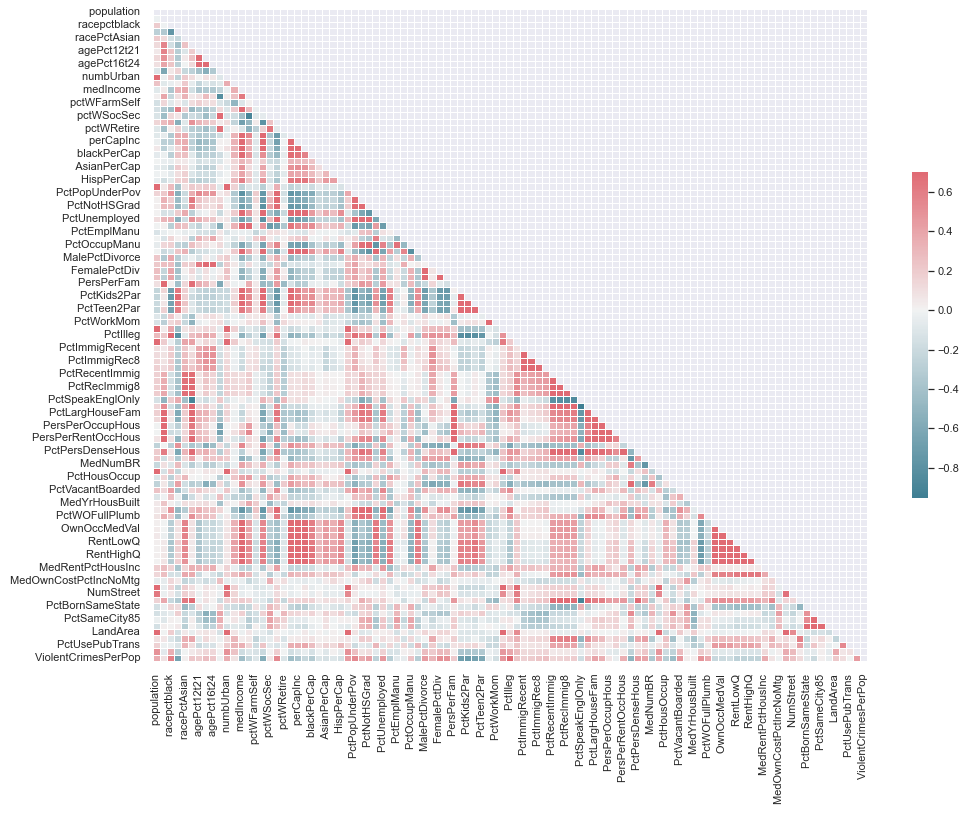

In [18]:
%matplotlib inline
sns.set(rc={'figure.figsize':(16,12)})
corr = data_train.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0, linewidths=.8, cbar_kws={"shrink": .5})

In [19]:
#print(list(data_train.columns))

In [20]:
data_train.columns = data_train.columns.str.strip()
data_test.columns = data_test.columns.str.strip()
data_val.columns = data_val.columns.str.strip()

In [21]:
y_train = data_train["ViolentCrimesPerPop"]
x_train = data_train.drop(["ViolentCrimesPerPop"], axis=1)
x_train_constant = sm.add_constant(x_train)

In [22]:
y_test = data_test["ViolentCrimesPerPop"]
x_test = data_test.drop(["ViolentCrimesPerPop"], axis=1)
x_test_constant = sm.add_constant(x_test)

In [23]:
y_val = data_val["ViolentCrimesPerPop"]
x_val = data_val.drop(["ViolentCrimesPerPop"], axis=1)
x_val_constant = sm.add_constant(x_val)

In [24]:
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)
print(y_val.shape)
print(x_val.shape)
#print(x_val_constant)

(298,)
(298, 100)
(299,)
(299, 100)
(298,)
(298, 100)


In [25]:
#x_val_constant.describe()

In [26]:
model2 = sm.OLS(y_train, x_train_constant)
model3 = sm.OLS(y_val, x_val_constant)
model4 = sm.OLS(y_test, x_test_constant)
model_2_fit = model2.fit()
model_3_fit = model3.fit()
model_4_fit = model4.fit()
pred_val = model_2_fit.predict(x_val_constant)
pred_train = model_2_fit.predict(x_train_constant)
pred_test = model_2_fit.predict(x_test_constant)

In [27]:
print(model_2_fit.summary())

                             OLS Regression Results                            
Dep. Variable:     ViolentCrimesPerPop   R-squared:                       0.759
Model:                             OLS   Adj. R-squared:                  0.637
Method:                  Least Squares   F-statistic:                     6.207
Date:                 Wed, 27 Apr 2022   Prob (F-statistic):           7.72e-28
Time:                         21:35:23   Log-Likelihood:                 251.07
No. Observations:                  298   AIC:                            -300.1
Df Residuals:                      197   BIC:                             73.27
Df Model:                          100                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [28]:
linear_SK = LinearRegression(fit_intercept = True).fit(X = x_train.to_numpy(), y = y_train.to_numpy())
print(linear_SK.coef_)
print(linear_SK.score(x_train.to_numpy(), y_train.to_numpy()))

[ 9.39083877e-01 -4.40295812e-01  3.98107805e-02 -1.05617082e-01
 -8.42959763e-02 -3.79186520e-01 -2.40495493e-01  7.26305980e-01
 -1.48831647e-01  1.14113225e-01 -8.93210876e-01  7.56750892e-02
 -4.01232189e-01 -2.53190525e-01  5.85271682e-02 -2.10591004e-01
  2.09285595e-01  1.04641420e-01 -1.13430089e-01  5.21870264e-01
  6.42307002e-01 -5.96827098e-01  1.46784827e-02 -7.68334594e-02
  1.08951281e-01 -3.25178102e-02  4.73522770e-02 -2.53802751e-01
 -3.09909412e-01 -1.89469670e-01  2.73358778e-01  2.97280376e-01
 -1.93514370e-01  2.07217115e-01 -9.80102715e-02 -3.99547933e-02
  1.22625455e-02 -3.46873706e-02 -3.88983107e-01  8.97226597e-02
 -5.71784089e-01  7.79699819e-01 -3.10924685e-01 -1.16779812e-01
 -2.64367080e-01 -4.38190293e-02 -1.06882445e-02  2.03649179e-01
 -2.83872456e-01  3.30258796e-01  2.55825395e-02 -1.46170752e-01
  1.91595196e-02  6.38613861e-02 -2.73985143e-01  2.10479807e-01
 -1.82205215e-02 -1.24056893e+00  1.97697163e+00 -8.19850972e-01
 -6.63669976e-02  6.44300

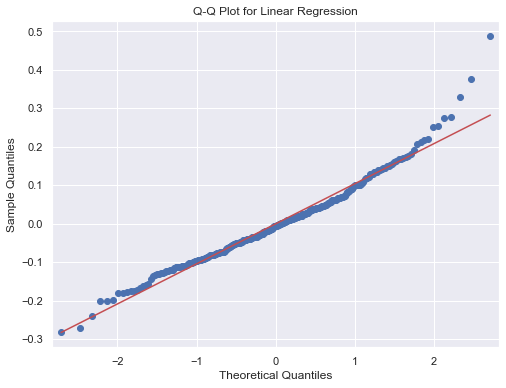

In [29]:
fig, ax = plt.subplots(figsize=(8,6))
sm.qqplot(model_2_fit.resid, ax=ax, line='s')
plt.title('Q-Q Plot for Linear Regression')
plt.show()

In [30]:
print('Linear Model Training Data: \nRMSE = {:,.3f} and R-squared = {:,.3f}\n'.format(
  np.sqrt(mean_squared_error(y_train, pred_train)),model_2_fit.rsquared))
print('Linear Model Testing Data: \nRMSE = {:,.3f} and R-squared = {:,.3f}\n'.format(
  np.sqrt(mean_squared_error(y_test, pred_test)), model_4_fit.rsquared))
print('Linear Model Validation Data: \nRMSE = {:,.3f} and R-squared = {:,.3f}\n'.format(
  np.sqrt(mean_squared_error(y_val, pred_val)), model_3_fit.rsquared))

Linear Model Training Data: 
RMSE = 0.104 and R-squared = 0.759

Linear Model Testing Data: 
RMSE = 0.153 and R-squared = 0.784

Linear Model Validation Data: 
RMSE = 0.155 and R-squared = 0.817



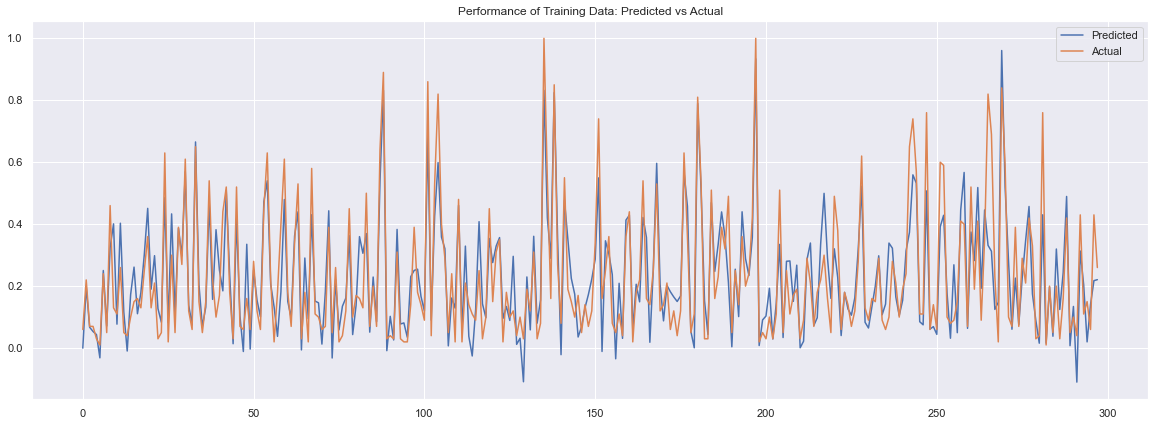

In [31]:
fig = plt.figure(figsize=[20, 32])
ax = fig.add_subplot(4, 1, 2)
ax.plot(pred_train, label='Predicted')
ax.plot(y_train, label='Actual')
ax.set_title('Performance of Training Data: Predicted vs Actual')
ax.legend()

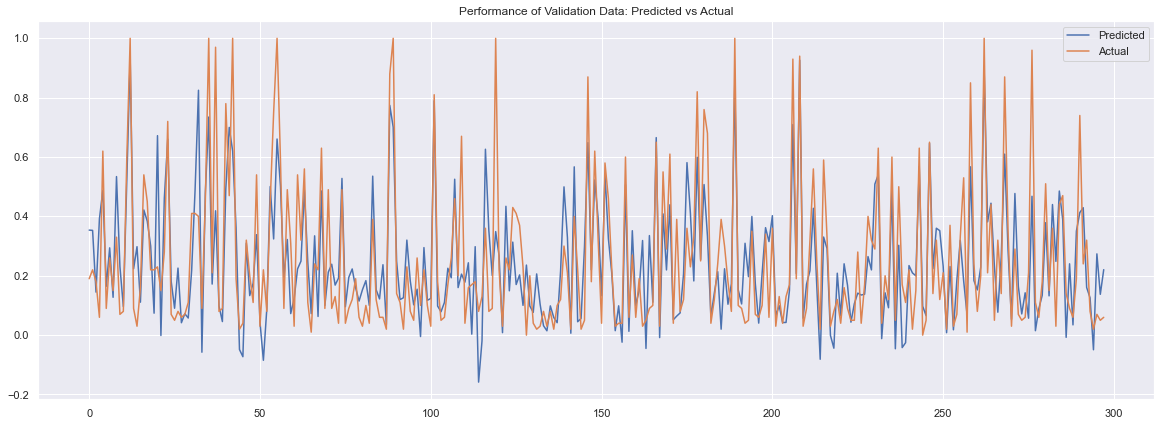

In [32]:
fig = plt.figure(figsize=[20, 32])
ax = fig.add_subplot(4, 1, 2)
ax.plot(pred_val, label='Predicted')
ax.plot(y_val, label='Actual')
ax.set_title('Performance of Validation Data: Predicted vs Actual')
ax.legend()

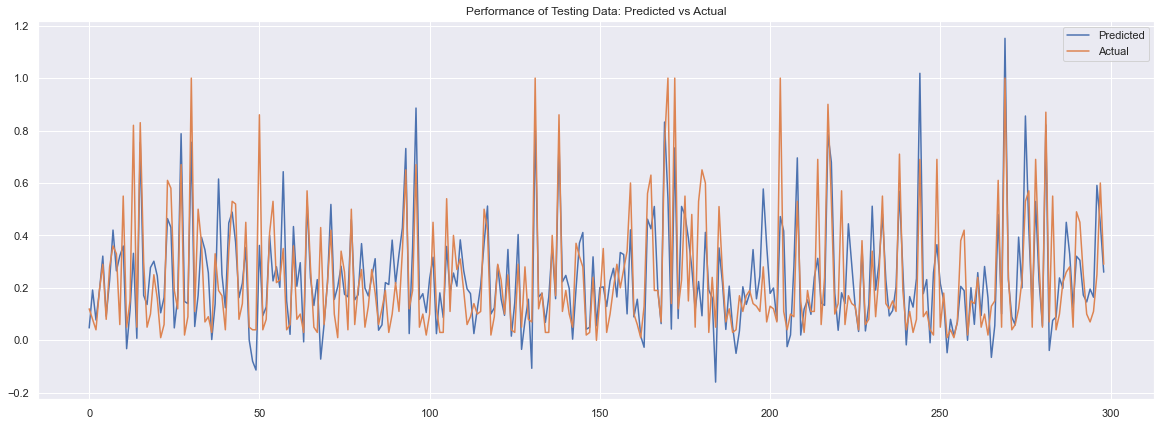

In [33]:
fig = plt.figure(figsize=[20, 32])
ax = fig.add_subplot(4, 1, 2)
ax.plot(pred_test, label='Predicted')
ax.plot(y_test, label='Actual')
ax.set_title('Performance of Testing Data: Predicted vs Actual')
ax.legend()

**END OF 1A_Q1_1**

Ridge Regression

In [34]:
ridgeReg = Ridge(alpha=0).fit(x_train,y_train)

print ("Training Data: \nR-squared - {:.3f}; RMSE - {:.3f}\n".format(ridgeReg.score(x_train,y_train), np.sqrt(np.mean((ridgeReg.predict(x_train.to_numpy()) - y_train.to_numpy())**2))))
print ("Validation Data: \nR-squared - {:.3f}; RMSE - {:.3f}\n".format(ridgeReg.score(x_val,y_val), np.sqrt(np.mean((ridgeReg.predict(x_val.to_numpy()) - y_val.to_numpy())**2))))
print ("Testing Data: \nR-squared - {:.3f}; RMSE - {:.3f}\n".format(ridgeReg.score(x_test,y_test), np.sqrt(np.mean((ridgeReg.predict(x_test.to_numpy()) - y_test.to_numpy())**2))))

Training Data: 
R-squared - 0.759; RMSE - 0.104

Validation Data: 
R-squared - 0.621; RMSE - 0.155

Testing Data: 
R-squared - 0.553; RMSE - 0.153



Optimising Alpha in validation dataset 

In [35]:
for newAlpha in [0, 0.001, 0.01, 0.5, 1, 10]:
    ridgeReg = Ridge(alpha=newAlpha).fit(x_val,y_val)
    #r2_train_ridge = ridgeReg.score(x_train, y_train)
    #r2_test_ridge = ridgeReg.score(x_test, y_test)
    r2_val_ridge = ridgeReg.score(x_val, y_val)
    print('Alpha = {}\nR-squared of validation data: {:.3f}\n'
         .format(newAlpha, r2_val_ridge))

Alpha = 0
R-squared of validation data: 0.817

Alpha = 0.001
R-squared of validation data: 0.817

Alpha = 0.01
R-squared of validation data: 0.815

Alpha = 0.5
R-squared of validation data: 0.781

Alpha = 1
R-squared of validation data: 0.766

Alpha = 10
R-squared of validation data: 0.713



In [36]:
ridgeReg = Ridge(alpha=0.001).fit(x_train,y_train)

print ("Training Data: \nR-squared - {:.3f}\n".format(ridgeReg.score(x_train,y_train)))
print ("Validation Data: \nR-squared - {:.3f}\n".format(ridgeReg.score(x_val,y_val)))
print ("Testing Data: \nR-squared - {:.3f}\n".format(ridgeReg.score(x_test,y_test)))

Training Data: 
R-squared - 0.759

Validation Data: 
R-squared - 0.628

Testing Data: 
R-squared - 0.561



In [37]:
alphas = np.arange(0, 0.1, 0.0001)
r_2 = []
coeff = []
train_acc = []
test_acc = []
val_acc = []

for a in alphas:
    glenn = Ridge(alpha=a).fit(X = x_train.to_numpy(), y = y_train.to_numpy())
    r_2.append(glenn.score(X = x_val.to_numpy(), y = y_val.to_numpy()))
    coeff.append(glenn.coef_)
    train_acc.append(np.sqrt(np.mean((glenn.predict(x_train.to_numpy()) - y_train.to_numpy())**2)))
    test_acc.append(np.sqrt(np.mean((glenn.predict(x_test.to_numpy()) - y_test.to_numpy())**2)))
    val_acc.append(np.sqrt(np.mean((glenn.predict(x_val.to_numpy()) - y_val.to_numpy())**2)))

Text(0.5, 1.0, 'Coefficients vs Alpha')

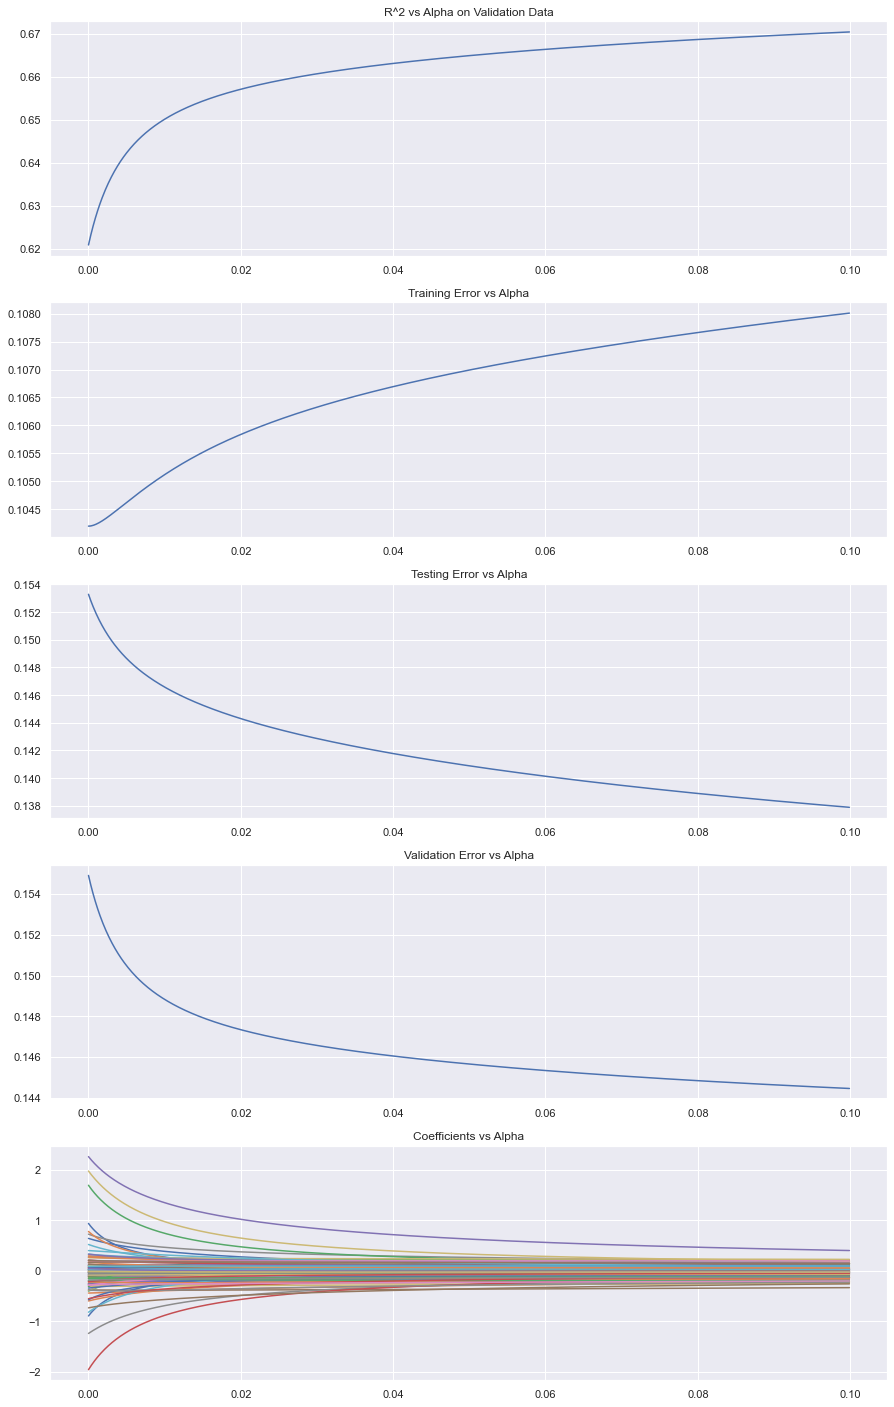

In [38]:
fig = plt.figure(figsize=[15, 25])
ax = fig.add_subplot(5, 1, 1)
ax.plot(alphas, r_2)
ax.set_title('R^2 vs Alpha on Validation Data')
ax = fig.add_subplot(5, 1, 2)
ax.plot(alphas, train_acc)
ax.set_title('Training Error vs Alpha')
ax = fig.add_subplot(5, 1, 3)
ax.plot(alphas, test_acc)
ax.set_title('Testing Error vs Alpha')
ax = fig.add_subplot(5, 1, 4)
ax.plot(alphas, val_acc)
ax.set_title('Validation Error vs Alpha')
ax = fig.add_subplot(5, 1, 5)
ax.plot(alphas, coeff)
ax.set_title('Coefficients vs Alpha')

Lasso Regression

In [39]:
lassoReg = Lasso(alpha=0).fit(x_train,y_train)

print ("Training Data: \nR-squared - {:.3f}; RMSE - {:.3f}\n".format(lassoReg.score(x_train,y_train), np.sqrt(np.mean((lassoReg.predict(x_train.to_numpy()) - y_train.to_numpy())**2))))
print ("Validation Data: \nR-squared - {:.3f}; RMSE - {:.3f}\n".format(lassoReg.score(x_val,y_val),np.sqrt(np.mean((lassoReg.predict(x_val.to_numpy()) - y_val.to_numpy())**2))))
print ("Testing Data: \nR-squared - {:.3f}; RMSE - {:.3f}\n".format(lassoReg.score(x_test,y_test),np.sqrt(np.mean((lassoReg.predict(x_test.to_numpy()) - y_test.to_numpy())**2))))

Training Data: 
R-squared - 0.758; RMSE - 0.104

Validation Data: 
R-squared - 0.635; RMSE - 0.152

Testing Data: 
R-squared - 0.566; RMSE - 0.151



In [40]:
for newAlpha in [0, 0.001, 0.0001, 0.00001, 0.000001]:
    lassoReg = Lasso(alpha=newAlpha).fit(x_val,y_val)
    #r2_train_lasso = lassoReg.score(x_train, y_train)
    #r2_test_lasso = lassoReg.score(x_test, y_test)
    r2_val_lasso = lassoReg.score(x_val, y_val)
    print('Alpha = {}\nR-squared of validation data: {:.3f}\n'
         .format(newAlpha, r2_val_lasso))

Alpha = 0
R-squared of validation data: 0.816

Alpha = 0.001
R-squared of validation data: 0.722

Alpha = 0.0001
R-squared of validation data: 0.801

Alpha = 1e-05
R-squared of validation data: 0.815

Alpha = 1e-06
R-squared of validation data: 0.816



In [41]:
alphas = np.arange(0, 0.019, 0.0001)
r_2 = []
coeff = []
train_acc = []
test_acc = []
val_acc = []

for a in alphas:
    lassoReg = Lasso(alpha=a).fit(X = x_train.to_numpy(), y = y_train.to_numpy())
    r_2.append(lassoReg.score(X = x_val.to_numpy(), y = y_val.to_numpy()))
    coeff.append(lassoReg.coef_)
    train_acc.append(np.sqrt(np.mean((lassoReg.predict(x_train.to_numpy()) - y_train.to_numpy())**2)))
    test_acc.append(np.sqrt(np.mean((lassoReg.predict(x_test.to_numpy()) - y_test.to_numpy())**2)))
    val_acc.append(np.sqrt(np.mean((lassoReg.predict(x_val.to_numpy()) - y_val.to_numpy())**2)))

Text(0.5, 1.0, 'Coefficients vs Alpha')

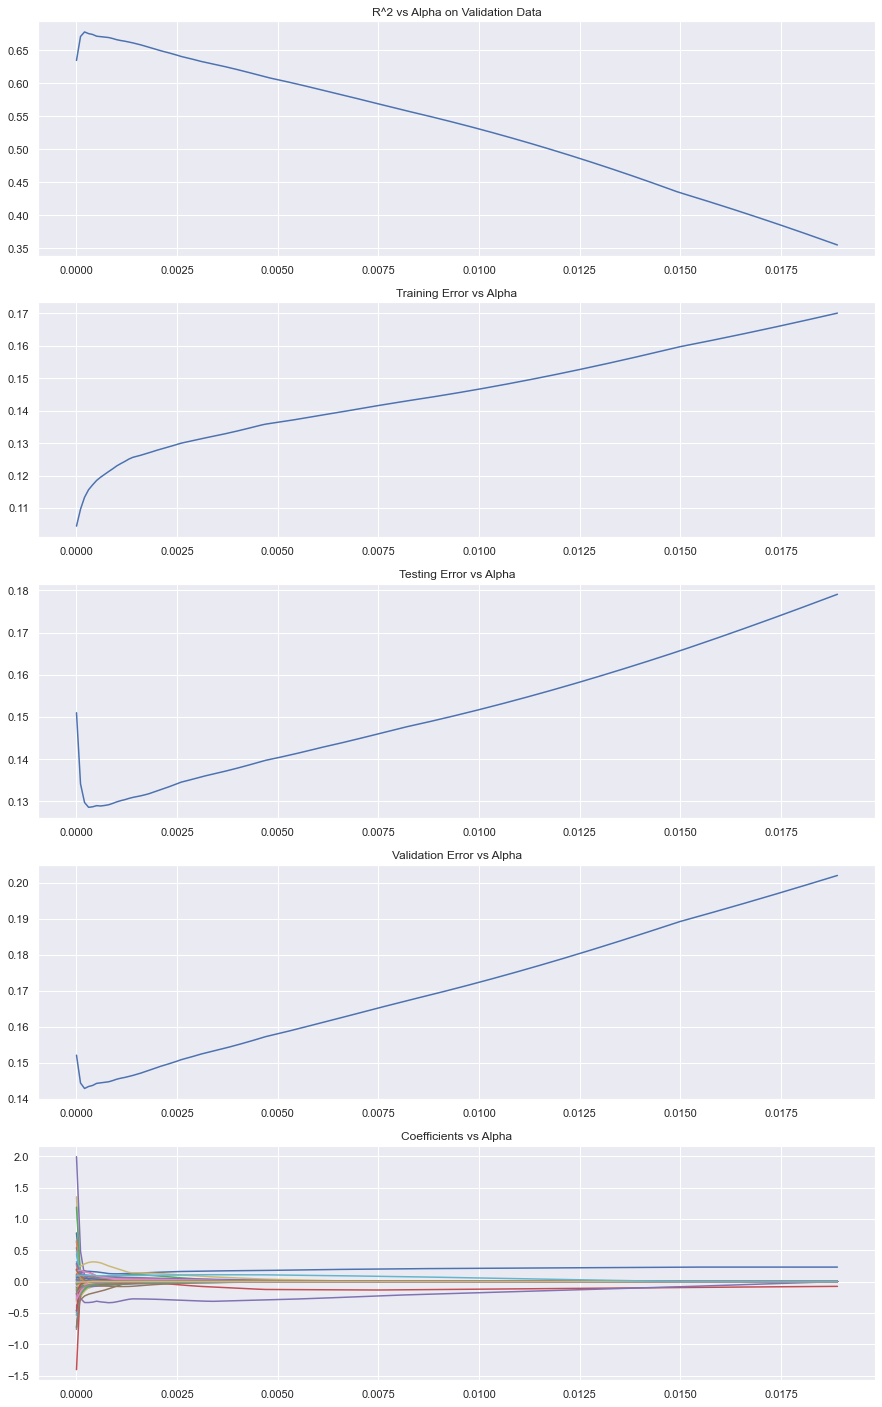

In [42]:
fig = plt.figure(figsize=[15, 25])
ax = fig.add_subplot(5, 1, 1)
ax.plot(alphas, r_2)
ax.set_title('R^2 vs Alpha on Validation Data')
ax = fig.add_subplot(5, 1, 2)
ax.plot(alphas, train_acc)
ax.set_title('Training Error vs Alpha')
ax = fig.add_subplot(5, 1, 3)
ax.plot(alphas, test_acc)
ax.set_title('Testing Error vs Alpha')
ax = fig.add_subplot(5, 1, 4)
ax.plot(alphas, val_acc)
ax.set_title('Validation Error vs Alpha')
ax = fig.add_subplot(5, 1, 5)
ax.plot(alphas, coeff)
ax.set_title('Coefficients vs Alpha')

In [43]:
lassoReg = Lasso(alpha=0.00001).fit(x_train,y_train)

print ("Training Data: \nR-squared - {:.3f}; RMSE - {:.3f}\n".format(lassoReg.score(x_train,y_train), np.sqrt(np.mean((lassoReg.predict(x_train.to_numpy()) - y_train.to_numpy())**2))))
print ("Validation Data: \nR-squared - {:.3f}; RMSE - {:.3f}\n".format(lassoReg.score(x_val,y_val),np.sqrt(np.mean((lassoReg.predict(x_val.to_numpy()) - y_val.to_numpy())**2))))
print ("Testing Data: \nR-squared - {:.3f}; RMSE - {:.3f}\n".format(lassoReg.score(x_test,y_test),np.sqrt(np.mean((lassoReg.predict(x_test.to_numpy()) - y_test.to_numpy())**2))))

Training Data: 
R-squared - 0.756; RMSE - 0.105

Validation Data: 
R-squared - 0.647; RMSE - 0.149

Testing Data: 
R-squared - 0.588; RMSE - 0.147



Comparing all the models 

Text(0.5, 1.0, 'Validation Data')

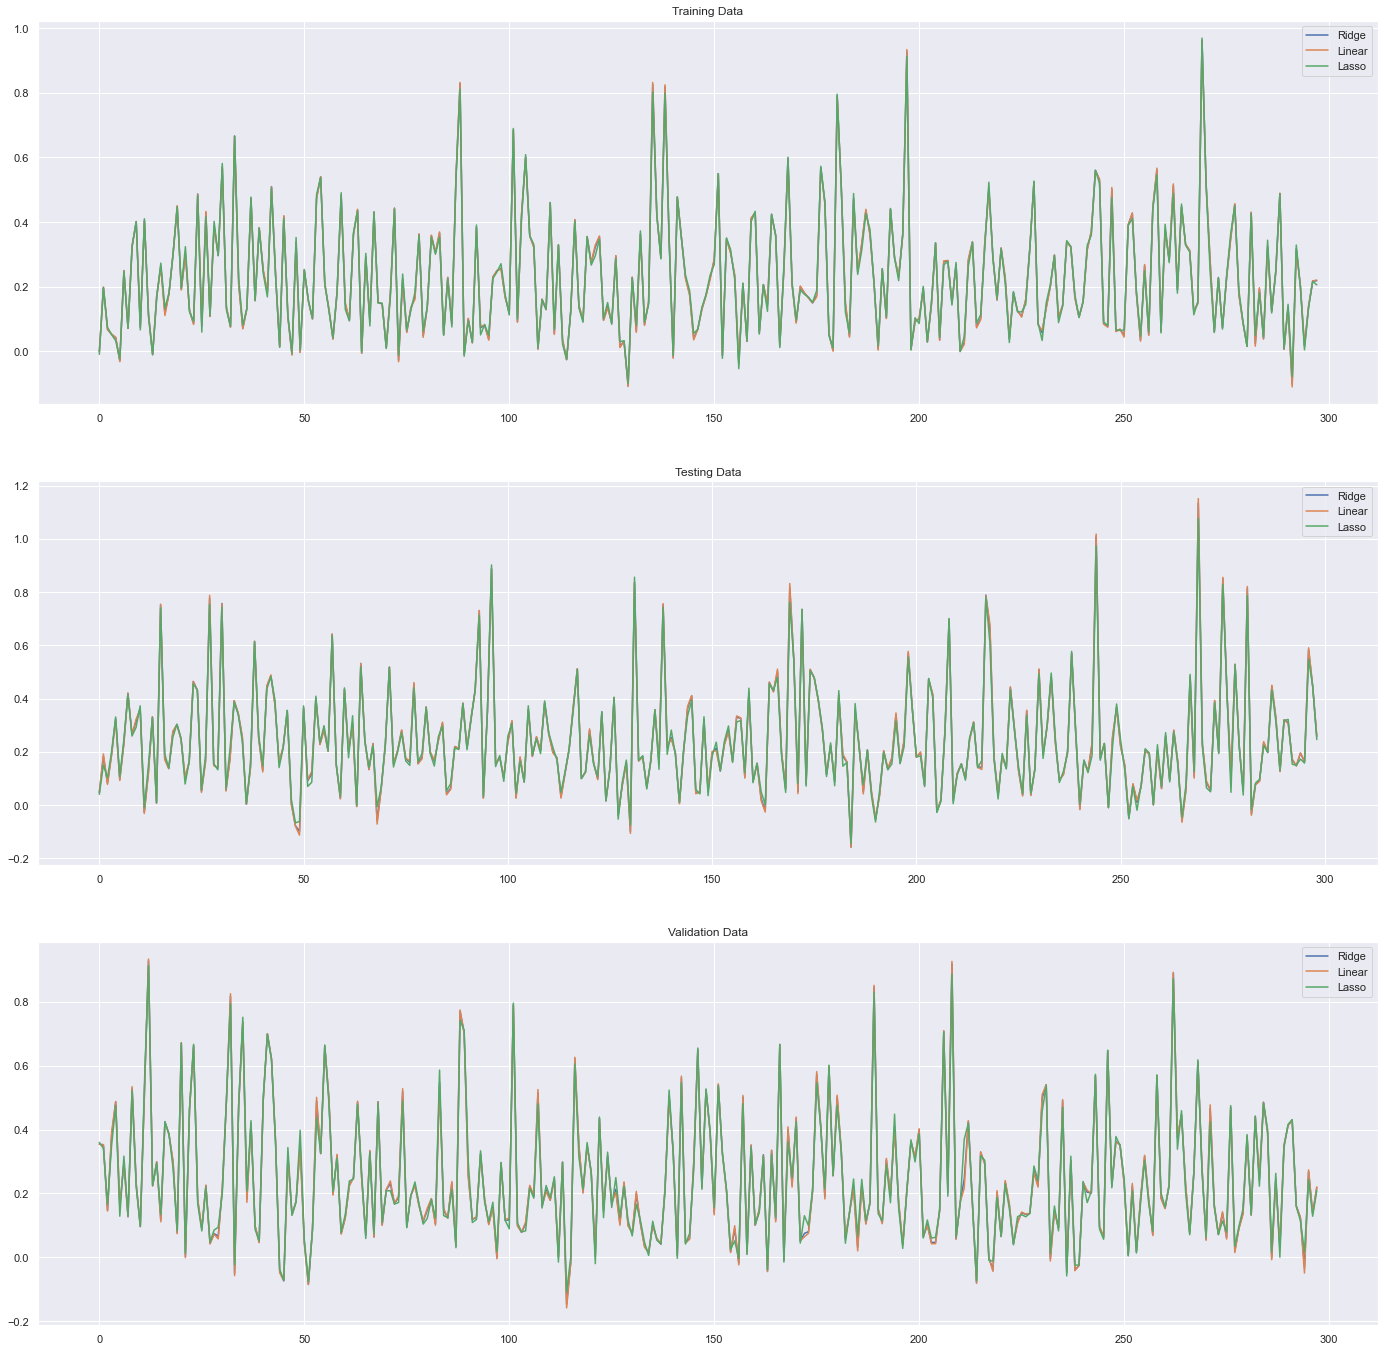

In [44]:
fig = plt.figure(figsize=[24, 24])

ax = fig.add_subplot(3, 1, 1)
ax.plot(ridgeReg.predict(x_train.values), label='Ridge')
ax.plot(linear_SK.predict(x_train.values), label='Linear')
ax.plot(lassoReg.predict(x_train.values), label='Lasso')
ax.legend()
ax.set_title('Training Data')

ax = fig.add_subplot(3, 1, 2)
ax.plot(ridgeReg.predict(x_test.values), label='Ridge')
ax.plot(linear_SK.predict(x_test.values), label='Linear')
ax.plot(lassoReg.predict(x_test.values), label='Lasso')
ax.legend()
ax.set_title('Testing Data')

ax = fig.add_subplot(3, 1, 3)
ax.plot(ridgeReg.predict(x_val.values), label='Ridge')
ax.plot(linear_SK.predict(x_val.values), label='Linear')
ax.plot(lassoReg.predict(x_val.values), label='Lasso')
ax.legend()
ax.set_title('Validation Data')